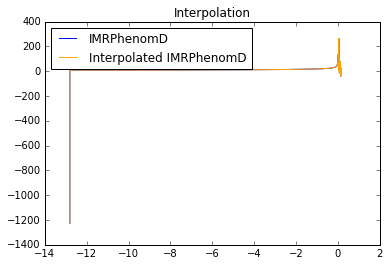

In [43]:
import pylab
from pycbc import waveform
from pycbc import conversions

from scipy import interpolate

approx = "IMRPhenomD"
# approx = "SEOBNRv4"
# approx = "HGimri"

f_low = 10
sample_rate = 2 * 4096

m1 = conversions.mass1_from_mtotal_q(100, 10)
m2 = conversions.mass2_from_mtotal_q(100, 10)

hp, hc = waveform.get_td_waveform(approximant=approx,
                                mass1=m1,
                                mass2=m2,
                                delta_t=1.0/sample_rate,
                                f_lower=f_low)

# hp, hc = hp.trim_zeros(), hc.trim_zeros()
amp = waveform.utils.amplitude_from_polarizations(hp, hc)
f = waveform.utils.frequency_from_polarizations(hp, hc)

def WaveformInterpolate (sampleTimes, sampleValues):
    func = interpolate.splrep(sampleTimes, sampleValues, s=0)
    
    return func

func = WaveformInterpolate (f.sample_times, f)

ynew = interpolate.splev(f.sample_times, func, der=0)

pylab.figure()
pylab.plot(f.sample_times, f, label=approx, color='blue')
pylab.plot(f.sample_times, ynew, label="Interpolated " + approx, color='orange')
pylab.legend(loc='upper left')
pylab.title("Interpolation")
pylab.show()